<a href="https://colab.research.google.com/github/msrit17/android/blob/main/Copy_of_ML_LAB_SET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Linear Regression

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Checking for null values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


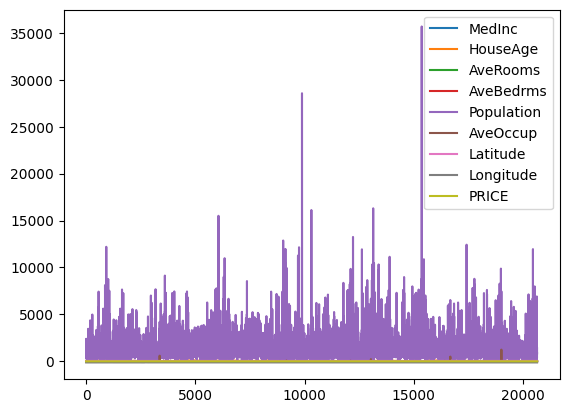


Covariance Matrix:
               MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc       3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge    -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms     1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms   -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population  10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup     0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude    -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude   -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
PRICE        1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

              AveOccup    Latitude   Longitude      PRICE  
MedInc        0.370289   -0.323860   -0.057765   1.508475  
HouseAge      1.724298    0.300346   -2.728244   1.533988  
AveRooms     -0.124689    0.562235   -0.136518   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

print("First 5 rows of the dataset:")
print(data.head())

print("\nChecking for null values:")
print(data.isnull().sum())

data.plot()
plt.show()

print("\nCovariance Matrix:")
print(data.cov(numeric_only=True))

print("\nCorrelation Matrix:")
print(data.corr(numeric_only=True))

X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

2) Gradient Descent

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

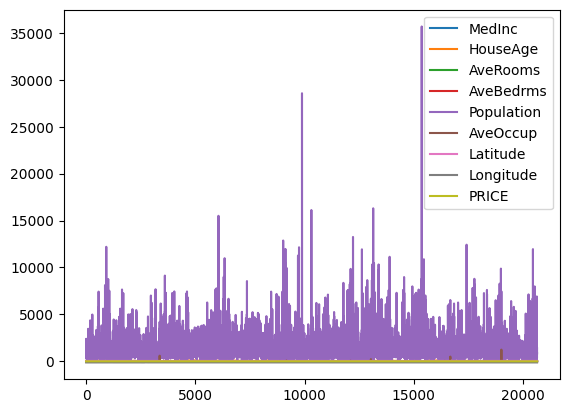

               MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc       3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge    -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms     1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms   -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population  10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup     0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude    -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude   -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
PRICE        1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

              AveOccup    Latitude   Longitude      PRICE  
MedInc        0.370289   -0.323860   -0.057765   1.508475  
HouseAge      1.724298    0.300346   -2.728244   1.533988  
AveRooms     -0.124689    0.562235   -0.136518   0.433826  
AveBedrms

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

data=pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target
print(data.head()) #displaying 5 rows of data
count=data.info()
print(count)
#to print number of null values
print(data.isnull().sum())
data.plot()
plt.show()
#cov matrix and corr matrix
cov_mat=data.cov(numeric_only=True)
corr_mat=data.corr(numeric_only=True)
print(cov_mat)
print(corr_mat)
#train and test model
X=data.drop(["PRICE"],axis=1)
y=data["PRICE"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.09,random_state = 42)
model=SGDRegressor()
model.fit(X_train,y_train)
#predicting values
y_pred=model.predict(X_test)
print(y_pred)
#accuracy and its graph
mse = mean_squared_error(y_test, y_pred)
a = 1 - (mse / np.var(y_test))
# a=accuracy_score(y_test,y_pred)
print(f"the accuracy of the model is : {a} ")

3) Logistic Regression

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64
sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


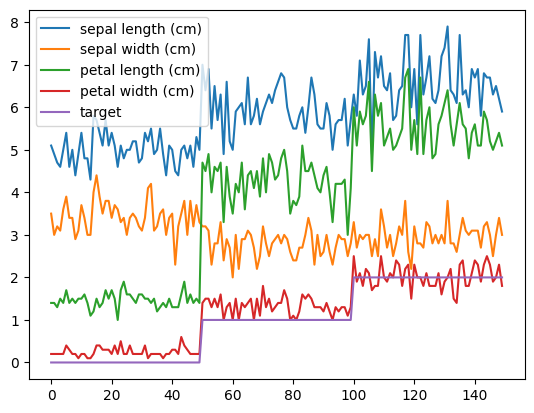


Covariance Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   
target                      0.530872         -0.152349           1.372483   

                   petal width (cm)    target  
sepal length (cm)          0.516271  0.530872  
sepal width (cm)          -0.121639 -0.152349  
petal length (cm)          1.295609  1.372483  
petal width (cm)           0.581006  0.597315  
target                     0.597315  0.671141  

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
print(iris_df.head())
print(iris_df.count())
print(iris_df.isnull().any()) #to check null values are present or not
print(iris_df.isnull().sum()) #to print number of null values
iris=iris_df
iris.plot() #graph representation
plt.show()

print("\nCovariance Matrix:")
print(iris.cov())
print("\nCorrelation Matrix:")
print(iris.corr())

X=iris.drop(["target"],axis=1) #to train and test model
y=iris["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(y_pred)
a=accuracy_score(y_test,y_pred)
print(f"the accuracy is : {a}")

4) FIND-S algorithm

In [ ]:
import pandas as pd
df=pd.read_csv("enjoysport.csv")
# print(df.head())
numOfAtt=len(df.columns)-1
print(f'Number is attributes are: {numOfAtt}\n')
# initial hypothesis
hyp=['0']*numOfAtt
# print(hyp)

for i in range(numOfAtt):
    hyp[i]=df.iloc[0,i]
print(f'Initial Hypothesis:\n{hyp}\n')
for i in range(len(df)):
    if df.iloc[i,6]=='yes':
        for j in range(numOfAtt):
            if df.iloc[i,j]!=hyp[j]:
                hyp[j]='?'

    print(hyp)
print(f'\nMost generalised Hypothesis is:\n{hyp}')

Number is attributes are: 6

Initial Hypothesis:
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
['sunny', 'warm', '?', 'strong', 'warm', 'same']
['sunny', 'warm', '?', 'strong', 'warm', 'same']
['sunny', 'warm', '?', 'strong', '?', '?']

Most generalised Hypothesis is:
['sunny', 'warm', '?', 'strong', '?', '?']


5) Candidate Elimination

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('enjoysport.csv')

# Get the list of attributes (excluding the target attribute)
attributes = list(data.columns[:-1])

# Initialize the version space with the most specific and most general hypotheses
specific_hypothesis = ['0'] * len(attributes)
general_hypothesis = ['?'] * len(attributes)

# Iterate through each example in the dataset
for index, row in data.iterrows():
    if row['enjoy_sport'] == 'yes':  # Positive example
        # Refine the most general hypothesis
        for i in range(len(attributes)):
            if specific_hypothesis[i] == '0':
                specific_hypothesis[i] = row[i]
            elif specific_hypothesis[i] != row[i]:
                specific_hypothesis[i] = '?'
    else:  # Negative example
        # Refine the most specific hypothesis
        for i in range(len(attributes)):
            if specific_hypothesis[i] != row[i] and specific_hypothesis[i] != '?':
                general_hypothesis[i] = specific_hypothesis[i]
                specific_hypothesis[i] = '?'

# Print the final hypotheses
print("Final Specific Hypothesis:", specific_hypothesis)
print("Final General Hypothesis:", general_hypothesis)


Final Specific Hypothesis: ['?', '?', '?', 'strong', '?', '?']
Final General Hypothesis: ['sunny', 'warm', '?', '?', '?', 'same']


6) ID3 Decision Tree

Predicted class for the new sample: ['yes']


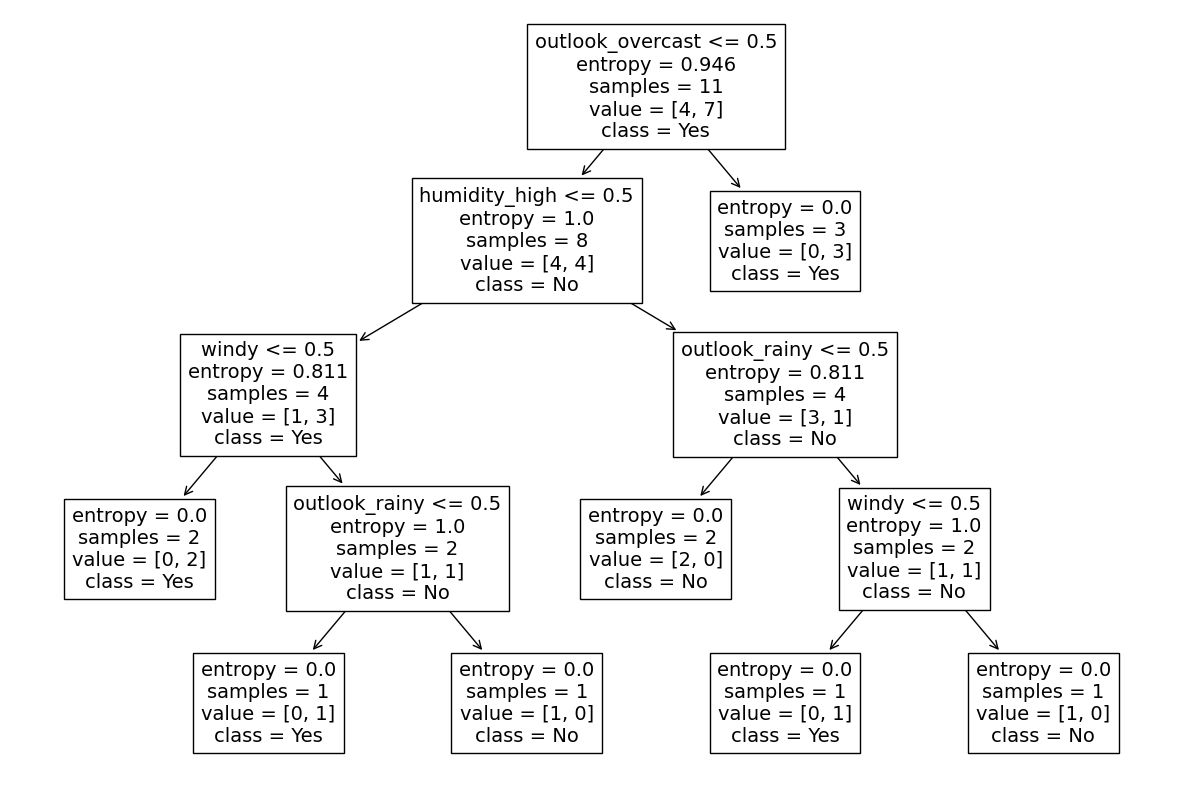

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

path = "PlayTennis.csv"
data = pd.read_csv(path)
X = data.drop('play', axis=1)
y = data['play']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 42)

decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)
new_sample = X_test.iloc[[0]]
predicted_class = decision_tree.predict(new_sample)
print("Predicted class for the new sample:", predicted_class)
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=X_encoded.columns, class_names=['No', 'Yes'])
plt.show()

7) k-means clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
data = {
 'VAR1': [1.713, 0.180, 0.353, 0.940, 1.486, 1.266, 1.540, 0.459, 0.773],
 'VAR2': [1.586, 1.786, 1.240, 1.566, 0.759, 1.106, 0.419, 1.799, 0.186],
 'CLASS': [0, 1, 1, 0, 1, 0, 1, 1, 1]
}
df = pd.DataFrame(data)
X = df[['VAR1', 'VAR2']]
Y=[1.713, 0.180, 0.353, 0.940, 1.486, 1.266, 1.540, 0.459, 0.773]

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)
new_case = [[0.906, 0.606]]
predicted_cluster = kmeans_model.predict(new_case)
print("Predicted cluster for the new case:", predicted_cluster[0])

Predicted cluster for the new case: 1


8) KNN

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


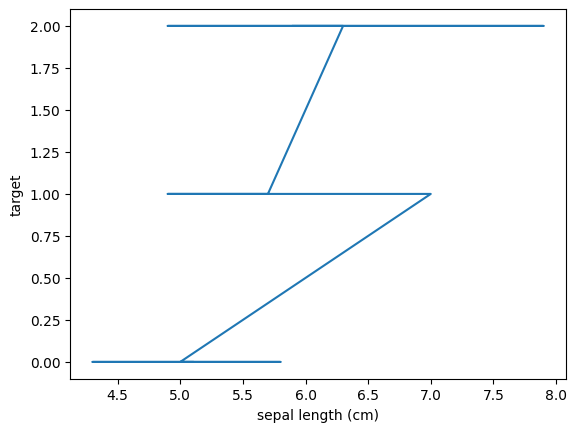

[0. 1. 1. 0. 0. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 0. 1. 2. 0. 2. 1. 0. 1. 1.
 0. 0. 2. 2. 2. 1.]
the accuracy is : 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

print(data.head())
x=data["sepal length (cm)"]
y=data["target"]
plt.xlabel("sepal length (cm)")
plt.ylabel("target")
plt.plot(x,y)
plt.show()
X=data.drop(["target"],axis=1)
y=data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)
model=KNeighborsClassifier()
model.fit(X,y)
y_pred=model.predict(X_test)
print(y_pred)
a=accuracy_score(y_test,y_pred)
print(f"the accuracy is : {a}")

9) RANDOM FOREST

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Checking for null values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


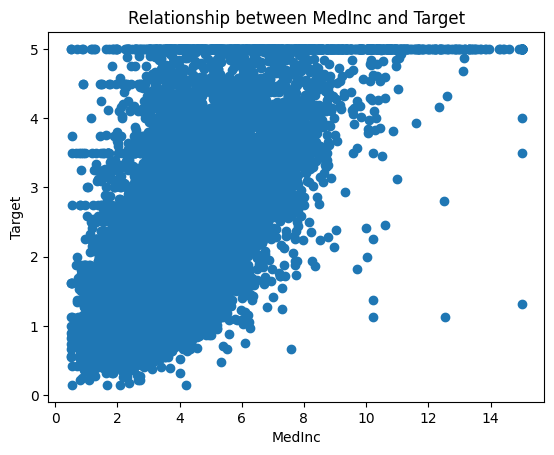


Covariance Matrix:
               MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc       3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge    -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms     1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms   -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population  10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup     0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude    -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude   -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
target       1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

              AveOccup    Latitude   Longitude     target  
MedInc        0.370289   -0.323860   -0.057765   1.508475  
HouseAge      1.724298    0.300346   -2.728244   1.533988  
AveRooms     -0.124689    0.562235   -0.136518   

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Import dataset
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
data = pd.DataFrame(data= np.c_[california_housing.data, california_housing.target], columns= california_housing.feature_names + ['target'])

# Step 2: Display first 5 rows
print("First 5 rows of the dataset:")
print(data.head())

# Step 3: Check for null values
print("\nChecking for null values:")
print(data.isnull().sum())

# Step 4: Visualize data
# For example, let's visualize the relationship between two variables (MedInc and target)
plt.scatter(data['MedInc'], data['target'])
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.title('Relationship between MedInc and Target')
plt.show()

# Step 5: Obtain covariance and correlation values
covariance_matrix = data.cov()
correlation_matrix = data.corr()

print("\nCovariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Step 6: Train and test model
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Apply Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Print the accuracy
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared Value:", r2)

10) Locally Weighted Regression algorithm

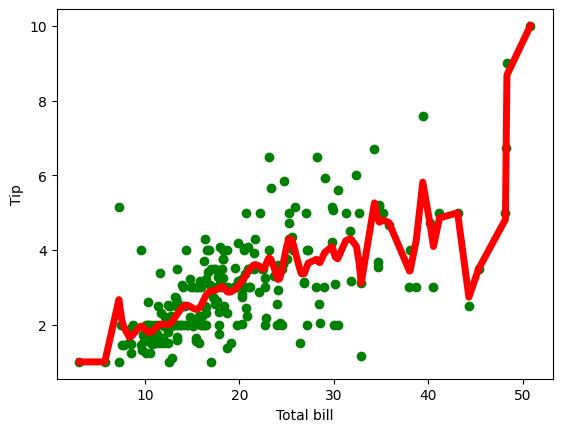

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
# load data points
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();

11) SVM

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import load_iris
# Step 1: Import dataset
# Loading Iris dataset from sklearn
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Step 2: Split the data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create an SVM classifier
# Using a Support Vector Classifier (SVC) with a radial basis function (RBF) kernel
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=42)

# Step 4: Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Step 5: Evaluate its performance
y_pred = svm_classifier.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#7
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
text_data = [
 "I love this sandwich, pos",
 "This is an amazing place, pos",
 "I feel very good about these cheese, pos",
 "This is my best work, pos",
 "What an awesome view, pos",
 "I do not like this restaurant, neg",
 "I am tired of this stuff, neg",
 "I can't deal with this, neg",
 "He is my sworn enemy, neg",
 "My boss is horrible, neg",
 "This is an awesome place, pos",
 "I do not like the taste of this juice, neg",
 "I love to dance, pos",
 "I am sick and tired of this place, neg",
 "What a great holiday, pos",
 "That is a bad locality to stay, neg",
 "We will have good fun tomorrow, pos",
 "I went to my enemy's house today, neg"
]
labels = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos','neg','pos','neg','pos','neg','pos','neg']

df=pd.DataFrame({'text': text_data, 'label': labels})
X = df['text']
y = df['label']
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='pos')
precision = precision_score(y_test, y_pred, pos_label='pos')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Total Instances of Dataset:", len(df))
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)

Total Instances of Dataset: 18
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Confusion Matrix:
[[2 0]
 [0 2]]
